In [2]:
from ultralytics import YOLO

# Load a model
model = YOLO('/Users/apaula/Library/CloudStorage/GoogleDrive-elysiacristata@gmail.com/My Drive/datasets/runs/pose/train2/weights/best.pt')

# Predict with the model
results = model('/Users/apaula/src/SharkVideoAnalysis/20240220_175636912_DJI_20240220175636_0003_V_tiles8/DJI_frame_790_tile_0.jpg') 



image 1/1 /Users/apaula/src/SharkVideoAnalysis/20240220_175636912_DJI_20240220175636_0003_V_tiles8/DJI_frame_790_tile_0.jpg: 320x320 11 fishs, 27.9ms
Speed: 0.6ms preprocess, 27.9ms inference, 0.8ms postprocess per image at shape (1, 3, 320, 320)


In [4]:
# Assuming 'results' is a list containing one 'Results' object as indicated
results_object = results[0]  # Access the first (and presumably only) Results object

# Access the keypoints from the Results object
keypoints = results_object.keypoints

# Now, let's safely access the keypoints data
if keypoints is not None:
    # The 'xy' attribute for coordinates, 'conf' for confidence scores
    # Convert tensor data to numpy arrays if necessary
    kp_xy = keypoints.xy.cpu().numpy()  # Coordinates of keypoints
    kp_conf = keypoints.conf.cpu().numpy()  # Confidence scores of keypoints


In [7]:
results[0].keypoints

ultralytics.engine.results.Keypoints object with attributes:

conf: tensor([[0.9952, 0.9386],
        [0.9901, 0.9892],
        [0.9785, 0.9278],
        [0.9945, 0.9407],
        [0.9896, 0.9222],
        [0.9968, 0.9858],
        [0.9916, 0.9908],
        [0.9946, 0.9693],
        [0.9459, 0.9771],
        [0.9688, 0.9752],
        [0.6563, 0.3890]])
data: tensor([[[128.1576, 254.9310,   0.9952],
         [ 85.7647, 270.7335,   0.9386]],

        [[166.1002, 121.9437,   0.9901],
         [204.1489,  90.7091,   0.9892]],

        [[110.0868, 109.9797,   0.9785],
         [ 66.6690,  97.1073,   0.9278]],

        [[297.4217,  79.9711,   0.9945],
         [246.5148,  95.5355,   0.9407]],

        [[246.9131, 260.1982,   0.9896],
         [205.2358, 268.7279,   0.9222]],

        [[ 66.1295,  68.9143,   0.9968],
         [ 38.8619,  75.5914,   0.9858]],

        [[175.1576, 145.8775,   0.9916],
         [205.7659, 127.8095,   0.9908]],

        [[203.3460, 131.3932,   0.9946],
         [

In [1]:
results[0]

NameError: name 'results' is not defined

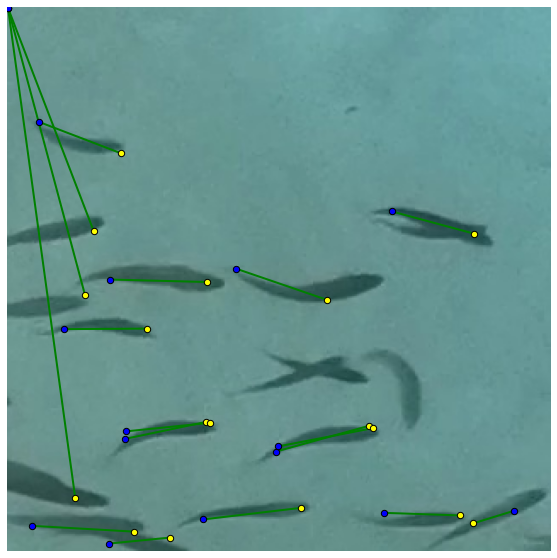

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the original image
#image_path = '/Users/apaula/src/SharkVideoAnalysis/tiles/frame_2_tile_14.jpg'
image_path = '/Users/apaula/src/SharkVideoAnalysis/frame_6_tile_50.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for Matplotlib

# kp_xy as provided, now iterating directly over it
# Assuming kp_xy is already available in your environment as shown

# Plot the image
plt.figure(figsize=(10, 10))
plt.imshow(image)

# Define colors for each point in the pair and for the connecting line
color_point1 = 'yellow'
color_point2 = 'blue'
color_line = 'green'

# Iterate over each pair of keypoints in kp_xy
for pair in kp_xy:
    point1, point2 = pair  # Unpack the pair of keypoints

    # Plot each point in the pair with different colors
    plt.scatter(point1[0], point1[1], c=color_point1, s=40, zorder=2, edgecolors='black')  # Add edge for visibility
    plt.scatter(point2[0], point2[1], c=color_point2, s=40, zorder=2, edgecolors='black')  # Add edge for visibility

    # Draw a line between the points in the pair
    plt.plot([point1[0], point2[0]], [point1[1], point2[1]], color=color_line, linewidth=2, zorder=1)

plt.axis('off')
plt.show()


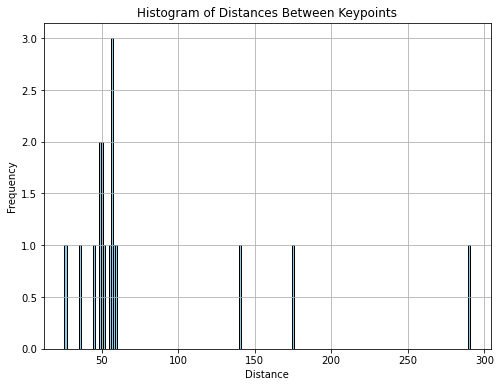

In [6]:
# Calculate Euclidean distances for each pair in kp_xy
distances = np.linalg.norm(kp_xy[:, 0, :] - kp_xy[:, 1, :], axis=1)

# Plot a histogram of the distances
plt.figure(figsize=(8, 6))
plt.hist(distances, bins=200, color='skyblue', edgecolor='black')
plt.title('Histogram of Distances Between Keypoints')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [12]:
# Calculate distances
distances = np.linalg.norm(kp_xy[:, 0, :] - kp_xy[:, 1, :], axis=1)

# Filter pairs based on the specified distance range
distance_range = (25, 100)
filtered_indices = np.where((distances >= distance_range[0]) & (distances <= distance_range[1]))[0]

# Apply filtering to keep only the pairs within the specified distance range
filtered_kp_xy = kp_xy[filtered_indices]

# Output the filtered pairs and their distances for reference
filtered_kp_xy, distances[filtered_indices]

(array([[[     66.522,      85.515],
         [     18.064,      66.979]],
 
        [[     266.08,      298.68],
         [     221.24,      297.15]],
 
        [[     212.49,      245.92],
         [     157.56,      261.13]],
 
        [[     82.073,      188.71],
         [      32.85,      189.01]],
 
        [[     74.077,      308.21],
         [     14.319,      304.82]],
 
        [[     116.51,      243.65],
         [     68.676,      253.65]],
 
        [[     215.05,      247.25],
         [     158.99,      258.05]],
 
        [[     117.05,      161.28],
         [     60.259,      159.81]],
 
        [[      273.6,       303.4],
         [     298.13,      295.84]],
 
        [[     172.54,       294.2],
         [     114.62,      301.05]],
 
        [[     274.43,      132.84],
         [     226.01,      119.76]],
 
        [[     95.416,      311.71],
         [     59.669,      315.22]],
 
        [[     187.47,      171.68],
         [     134.42,      153.49]],
 

In [13]:
# Load the original image
image_path = '/Users/apaula/src/SharkVideoAnalysis/frame_6_tile_50.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for Matplotlib

# kp_xy as provided, now iterating directly over it
# Assuming kp_xy is already available in your environment as shown

# Plot the image
plt.figure(figsize=(10, 10))
plt.imshow(image)

# Define colors for each point in the pair and for the connecting line
color_point1 = 'yellow'
color_point2 = 'blue'
color_line = 'green'
# Iterate over each pair of keypoints in kp_xy
for pair in filtered_kp_xy:
    point1, point2 = pair  # Unpack the pair of keypoints

    # Plot each point in the pair with different colors
    plt.scatter(point1[0], point1[1], c=color_point1, s=40, zorder=2, edgecolors='black')  # Add edge for visibility
    plt.scatter(point2[0], point2[1], c=color_point2, s=40, zorder=2, edgecolors='black')  # Add edge for visibility

    # Draw a line between the points in the pair
    plt.plot([point1[0], point2[0]], [point1[1], point2[1]], color=color_line, linewidth=2, zorder=1)

plt.axis('off')
plt.show()


[ WARN:0@15268.475] global loadsave.cpp:248 findDecoder imread_('/Users/apaula/src/SharkVideoAnalysis/frame_6_tile_50.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.8.0) /Users/xperience/GHA-OpenCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


/var/folders/fp/69w3242x183607ffnzm682500000gp/T/ipykernel_22566/306707003.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('hsv')


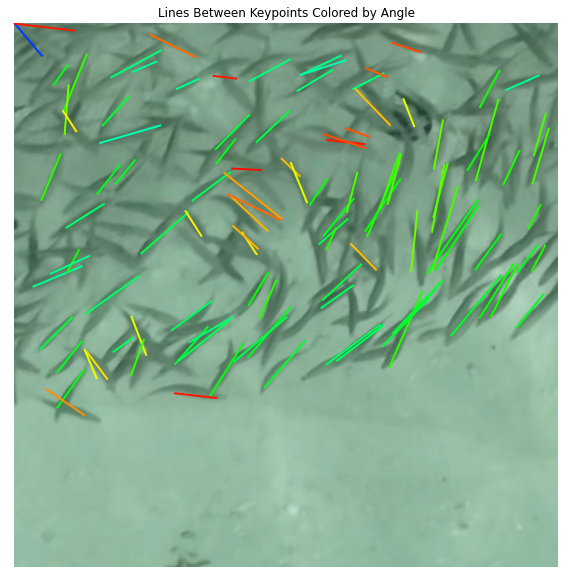

In [24]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Function to calculate angles in radians between pairs of keypoints
def calculate_angles(kp_pairs):
    # Calculate the difference in coordinates
    deltas = kp_pairs[:, 1, :] - kp_pairs[:, 0, :]
    # Calculate the angle using arctan2, which returns angles in radians
    angles = np.arctan2(deltas[:, 1], deltas[:, 0])
    return angles

# Calculate angles for the filtered keypoint pairs
angles = calculate_angles(filtered_kp_xy)

# Normalize the angles to the range [0, 1] for colormap mapping
# The angle range of arctan2 is [-pi, pi], so we normalize accordingly
normalized_angles = (angles + np.pi) / (2 * np.pi)

# Use a circular colormap ('hsv')
colormap = cm.get_cmap('hsv')
colors = colormap(normalized_angles)
# Load the original image
image_path = '/Users/apaula/src/SharkVideoAnalysis/tiles/frame_2_tile_14.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for Matplotlib

# kp_xy as provided, now iterating directly over it
# Assuming kp_xy is already available in your environment as shown

# Plotting
plt.figure(figsize=(10, 10))
plt.imshow(image)
# Plot each line with color according to its angle
for pair, color in zip(filtered_kp_xy, colors):
    plt.plot([pair[0][0], pair[1][0]], [pair[0][1], pair[1][1]], color=color, linewidth=2)

plt.axis('equal')
plt.axis('off')
plt.title('Lines Between Keypoints Colored by Angle')
plt.show()


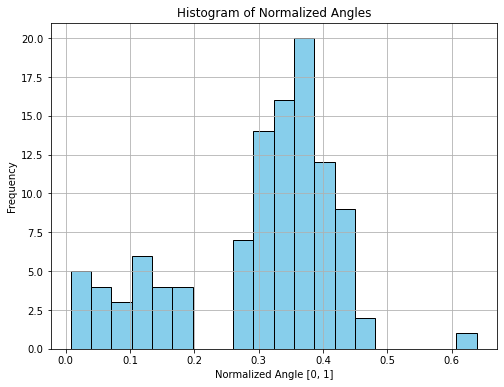

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Function to calculate angles in radians between pairs of keypoints
def calculate_angles(kp_pairs):
    # Calculate the difference in coordinates
    deltas = kp_pairs[:, 1, :] - kp_pairs[:, 0, :]
    # Calculate the angle using arctan2, which returns angles in radians
    angles = np.arctan2(deltas[:, 1], deltas[:, 0])
    return angles

# Calculate angles for the filtered keypoint pairs
angles = calculate_angles(filtered_kp_xy)

# Normalize the angles to the range [0, 1] for colormap mapping
# The angle range of arctan2 is [-pi, pi], so we normalize accordingly
normalized_angles = (angles + np.pi) / (2 * np.pi)

# Plot a histogram of the normalized angles
plt.figure(figsize=(8, 6))
plt.hist(normalized_angles, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Normalized Angles')
plt.xlabel('Normalized Angle [0, 1]')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
